In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A Population Dynamics Model of hard Clam

Title: A Population Dynamics Model of the Hard Clam, Mercenaria Mercenaria: Development of the Age- and Length-frequency Structure of the Population

Authors: Eileen E. Hofmann, John M. Klinck, John N. Kraeuter, Eric N. Powell, Ray E. Grrzzle, Stuart C. Buckner, V. Monica Bricelj

J. of Shellfish Research, 25(2):417-445 (2006). 
https://doi.org/10.2983/0730-8000(2006)25[417:APDMOT]2.0.CO;2

## 2.2 Hard Clam Model Governing Equations
### 2.2.1 Weight Equation
Changes in hard clam body weight (W, mg dry wt) over time (t) are based on net production, which is given by the difference in assimilation (A) and respiration (R) as:

**Eq.(1)**

$$\frac{\mathrm{d} W}{\mathrm{d} t} = \left ( A - R \right ) W$$

The weight change obtained from Eq. (1) is the primary input into the calculation of hard clam condition index, described in the next section. The parameterizations for **assimilation** and **respiration** for the individual-based hard clam model are described in subsequent sections and definitions and values of coefficients are given in Table 1.

**Table (1)**

**Definitions**                    | **Symbol**        | **Unit**                       | **Value**
-----------------------------------|-------------------|--------------------------------|--------------------
average weight constant            | $a_{0}$           | mg dry wt $(mm)^{-3}$           | $1.1373\times 10^{-5}$
average weight constant            | $b_{0}$           | mg dry wt $(mm)^{-2}$           | $-6.6545\times 10^{-5}$
average weight constant            | $c_{0}$           | mg dry wt $(mm)^{-1}$           | $1.4092\times 10^{-3}$
average weight constant            | $d_{0}$           | mg dry wt $(mm)^{-0}$           | $-1.4814\times 10^{-2}$
maximnum weight constant           | $a_{m}$           | mg dry wt $(mm)^{-3}$           | $1.7060\times 10^{-5}$
maximnum weight constant           | $b_{m}$           | mg dry wt $(mm)^{-2}$           | $-9.9817\times 10^{-5}$
maximnum weight constant           | $c_{m}$           | mg dry wt $(mm)^{-1}$           | $2.1139\times 10^{-3}$
maximnum weight constant           | $d_{m}$           | mg dry wt $(mm)^{-0}$           | $2.2220\times 10^{-2}$
maximum length                     | $L_{inf}$         | mm                                       | 150

### 2.2.2 Condition Index Equation
Hard clam condition index, $C(L, W)$, is defined as a ratio of the current weight, $W(t)$ obtained from Eq. (1), to a standard weight, $W_0 (L)$, and a maximum weight, $W_m (L)$, of an individual hard clam as:

**Eq.(2)**

$$C(L, W) = \dfrac {W(t)-W_0 (L)}{W_m (L)-W_0 (L)}$$

where the standard and maximum clam weights are functions of clam length, L (mm). The condition index obtained from Eq. (2) indicates how fit a clam is at any given time for a specified set of environmental conditions. Positive condition index, when a clam has a mass for a given length that is above the standard value, ranges from 0–1. Values less than zero occur when a clam has a mass for a given length below that obtained from the standard length-weight relationship.

The standard and maximum weights for individual hard clams as a function of clam length used in Eq. (2) are obtained from empirically-derived relationships. The weight and length observations for 30–120 mm hard clams given in Hibbert (1977) were used to develop an allometric equation. However, using this allometric equation for the standard length-weight relationship resulted in growth for 5–20 mm hard clams that was too rapid relative to observed growth rates for this size range. Examination of additional hard clam length and weight data (Kraeuter unpubl. data), that included 5–20 mm clams (n = 450), showed that small hard clams weigh more at a given length than is estimated from the Hibbert (1977) length-weight relationship. Combining the 5–20 mm hard clam data with the Hibbert (1977) data allowed a new average length-weight relationship to be obtained:

**Eq.(3)**

$$W_0 (L)=a_0L^3 + b_0L^2 + c_0L + d_0$$

The maximum weight attained for a given length is:

**Eq.(4)**

$$W_m (L)=a_mL^3 + b_mL^2 + c_mL + d_m$$

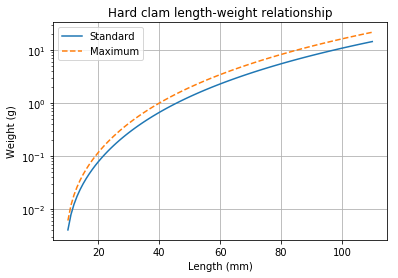

In [179]:
def wt_s(length):
    a_0 =  0.011373   # mg dry wt(mm)^{-3}
    b_0 = -0.066545   # mg dry wt(mm)^{-2}
    c_0 =  1.409200   # mg dry wt(mm)^{-1}
    d_0 = -14.81400   # mg dry wt
    wt_s = a_0 * length ** 3 + b_0 * length ** 2 + c_0 * length + d_0
    return wt_s # unit: mg dry wt

def wt_m(length):
    a_m =  0.017060   # mg dry wt(mm)^{-3}
    b_m = -0.099817   # mg dry wt(mm)^{-2}
    c_m =  2.113900   # mg dry wt(mm)^{-1}
    d_m = -22.22000   # mg dry wt
    wt_m = a_m * length ** 3 + b_m * length ** 2 + c_m * length + d_m
    return wt_m # unit: mg dry wt

length = np.linspace(10,110,101)
plt.semilogy(length, wt_s(length)/1000, \
             '-', label='Standard')
plt.semilogy(length, wt_m(length)/1000, \
             '--', label='Maximum')
plt.title('Hard clam length-weight relationship')
plt.xlabel('Length (mm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid(True)
plt.show()

This length-weight relationship (Fig. 3) allows for small hard clams that are heavier for a given length and large clams that are longer for a given weight than the values obtained from the relationship derived by Hibbert (1977). The implication is that small hard clams do not follow allometric growth. Implementing Eqs. (3) and (4) with the hard clam model resulted in simulated growth rates that gave lengths during the first five years of clam life that matched the hard clam age-length observations given in Wallace (1991).

The time-dependent variation in hard clam condition index (Eq. 2) is calculated from changes in weight (Eq. 1), the average and maximum length-weight relationships (Eqs. 3 and 4, respectively) and length (Eq. 6 in the next section) as:

**Eq. (5)**

$$\dfrac{\mathrm{d} C(L, W)}{\mathrm{d} t} = \dfrac {1}{(W_m (L)-W_0 (L))^2} [(W_m(L)-W_0 (L))(\dfrac{\mathrm{d}W}{\mathrm{d}t}-\dfrac{\mathrm{d}W_0}{\mathrm{d}L}\dfrac{\mathrm{d}L}{\mathrm{d}t})-(W(t)-W_0 (L))(\dfrac{\mathrm{d}W_m}{\mathrm{d}L}-\dfrac{\mathrm{d}W_0}{\mathrm{d}L})\dfrac{\mathrm{d}L}{\mathrm{d}t}]$$

### 2.2.3 Length Equation
When excess weight for a given length relative to the average length-weight relationship (Eq. 3) occurs, a positive condition index, the excess weight produces an increase in shell length calculated as:

**Eq. (6)**

$$\dfrac{\mathrm{d}L}{\mathrm{d}t}=gl(C)L\dfrac{L_{inf}-L}{L_{inf}}$$

where $gl(C)$ is the rate of shell length increase and $L_{inf}$ sets a maximum hard clam length. The form of Eq. (6) results in incrementally smaller increases in shell length as the maximum length is approached.

The rate of shell length change is a function of hard clam condition and is assumed to follow a hyperbolic relationship:

**Eq. (7)**

$$gl(C)=gl_{max}\dfrac{C(L, W)}{glk+C(L, W)}$$

where $gl_{max}$ is the maximum specific rate of increase in length, $glk$ is the condition index value at which hard clam length increments at one-half the value of the maximum rate, and condition, $C(L, W)$, is obtained from Eq. (2). The rate of shell increase is analogous to the parameter in the von Bertalanffy equation, which determines the rate of length increase (k). As a result, observations and models of hard clam growth (Kennish & Loveland 1980, Loesch & Haven 1973) can be used as a guide for determining the parameters controlling the rate of shell growth in Eq. (7).

## 2.3 Model Parameterizations
### 2.3.1 Filtration Rate
Doering and Oviatt (1986) provide a relationship for hard clam filtration rate ($FR$) as a function of clam length and temperature ($T$) of the form:

**Eq. (8)**

$$FR_0(L,T)=\dfrac{L^{fa}T^{fb}}{fc}$$

that allows filtration rate to increase with increasing hard clam length and temperature.

Results from experiments designed to show the effect of temperature on hard clam filtration rate over a range of lengths (Hamwi 1969) indicate that filtration rate is maximal between 17°C and 25°C, decreases at temperatures above and below these values, and ceases at 6°C and 32°C. This pattern holds over a range of hard clam lengths. This temperature dependency was incorporated by modifying Eq. (8) as:

**Eq. (9)**

$$FR_1(L,T)=FR_0f_0(1+tanh(\dfrac{T-T_{Low}}{Tf}))(1-tanh(\dfrac{T-T_{High}}{Tf}))$$

where the hyperbolic tangent function (tanh) provides the temperature dependency that is observed in the observations presented in Hamwi (1969). However, the use of Eq. (9) with an upper temperature limit ($T_{High}$) on maximal filtration rate of 25°C produced incorrect growth rates for simulations that used summer temperatures that exceeded this value. Setting the upper temperature limit for maximum filtration rate to 29°C (Fig. 4) gave correct growth rates for hard clams in environments where the summer maximum temperatures exceeded 25°C. Some evidence for a higher temperature limit on filtration is provided by observations (Ansell 1968) that show hard clam growth up to 28–29°C, which then decreases at higher temperatures. These limited observations and the simulation results obtained using Eq. (9) suggest that a latitudinal variation in the upper temperature limit for hard clam maximum filtration may exist. However, verification studies using environmental conditions from southern regions have not been done. Thus, the form of the filtration rate temperature dependency for temperatures exceeding those typical of Great South Bay is tentative.

In [175]:
len = [36.49,45.77,97.402]
for i in len:
    wt = wt_s(i)
    print(wt)

500.58356971597703
1000.7606158488092
10000.540450975554


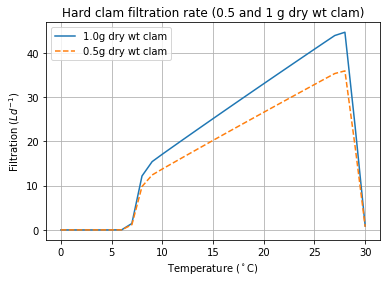

In [180]:
def fr_0(length,temper):
    f_a = 0.96     # none
    f_b = 0.95     # none
    f_c = 2.95     # (cm $^\circ$C ind min)mL^{-1} 
                   # => (mm $^\circ$C ind h)mL^{-1}
    fr_0 = (length ** f_a) * \
           (temper ** f_b) / \
           (f_c * 10 / 60)
    return fr_0 # unit: mL h^{-1}

def fr_1(length,temper):
    f_0 = 0.25     # none
    t_l = 7.5      # $^\circ$C
    t_h = 29.0     # $^\circ$C
    t_f = 0.5      # $^\circ$C
    fr_1 = fr_0(length,temper) * f_0 * \
           (1 + np.tanh((temper - t_l) / t_f)) * \
           (1 - np.tanh((temper - t_h) / t_f))
    return fr_1 # unit: mL h^{-1}

temper = np.linspace(0,30,31)
plt.plot(temper,fr_1(45.77,temper) / 1000 * 24, \
         '-', label='1.0g dry wt clam')
plt.plot(temper,fr_1(36.49,temper) / 1000 * 24, \
         '--', label='0.5g dry wt clam')
plt.title('Hard clam filtration rate (0.5 and 1 g dry wt clam)')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Filtration ($L d^{-1}$)')
plt.legend()
plt.grid(True)
plt.show()

Additional experimental results show that hard clam filtration rate increases with increasing salinity (Hamwi 1969). This effect, described by a quadratic function, modifies filtration rate as:

**Eq.(10)**

$$FR_2(L,T,S)=FR_1(f_{s0} + f_{s1}S + f_{s2}S^2)$$

where S is the ambient salinity.

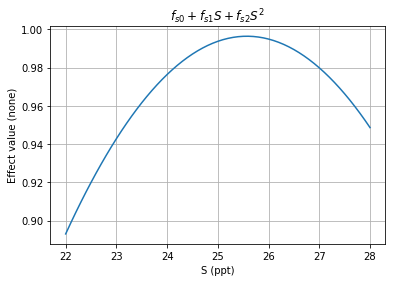

In [119]:
f_s0 = -4.302     # none
f_s1 = 0.4144     # ppt^{-1}
f_s2 = -0.0081027 # ppt^{-2}
salin = np.linspace(22,28,61)
y = f_s0 + f_s1 * salin + f_s2 * salin ** 2
plt.plot(salin,y)
plt.title('$f_{s0} + f_{s1}S + f_{s2}S^2$')
plt.xlabel('S (ppt)')
plt.ylabel('Effect value (none)')
plt.grid(True)
plt.show()

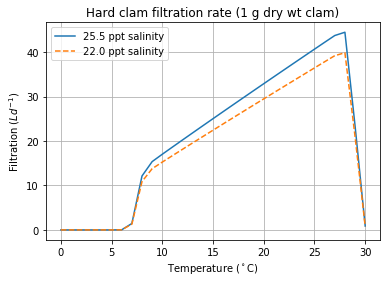

In [182]:
def fr_2(length,temper,salin):
    f_s0 = -4.302     # none
    f_s1 = 0.4144     # ppt^{-1}
    f_s2 = -0.0081027 # ppt^{-2}
    fr_2 = fr_1(length,temper) * \
           (f_s0 + f_s1 * salin + f_s2 * salin ** 2)
    return fr_2 # unit: mL h^{-1}

temper = np.linspace(0,30,31)
plt.plot(temper,fr_2(45.77,temper,25.5) / 1000 * 24,\
         '-', label='25.5 ppt salinity')
plt.plot(temper,fr_2(45.77,temper,22) / 1000 * 24,\
         '--', label='22.0 ppt salinity')
plt.title('Hard clam filtration rate (1 g dry wt clam)')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Filtration ($L d^{-1}$)')
plt.legend()
plt.grid(True)
plt.show()

Increased total suspended solids ($TSS$, g dry wt $L^{−1}$ ) reduce the food acquired by hard clams through reduced filtration and increased pseudofeces production (Bricelj & Malouf 1984, Bricelj et al. 1984, Murphy 1985). The data given in Bricelj and Malouf (1984) and Bricelj et al. (1984) on the percent loss of algae in pseudofeces as a function of sediment concentration were used to develop a relationship that reduces the effectiveness of filtration with increasing TSS concentration. This effect is added to the filtration rate parameterization as:

**Eq.(11)**

$$FR(L,T,S,TTS)=FR_2(1 - a_{TSS}TSS^{b_{TSS}})$$

The filtration rate given by Eq. (11) is the value that is input to the hard clam model.

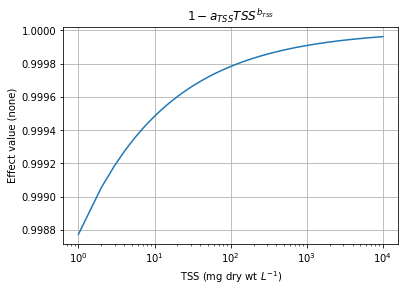

In [183]:
a_tss = 1.225   # L(g dry wt)^{-1}
                # => L(mg dry wt)^{-1}
b_tss = -0.375  # none
tss = np.linspace(1,10000,10000)
yy = 1 - (a_tss /1000 * (tss ** b_tss))
plt.semilogx(tss,yy)
plt.title('$1 - a_{TSS}TSS^{b_{TSS}}$')
plt.xlabel('TSS (mg dry wt $L^{−1}$)')
plt.ylabel('Effect value (none)')
plt.grid(True)
plt.show()

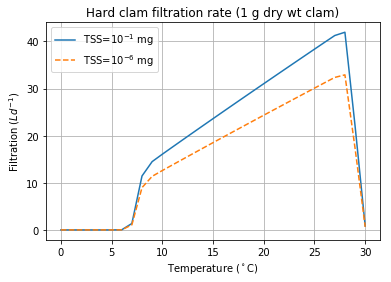

In [122]:
def fr(length,temper,salin,tss):
    a_tss = 1.225   # L(g dry wt)^{-1}
                    # => L(mg dry wt)^{-1}
    b_tss = -0.375  # none
    fr = fr_2(length,temper,salin) * \
         (1 - (a_tss /1000 * (tss ** b_tss)))
    return fr # none

temper = np.linspace(0,30,31)
plt.plot(temper,fr(45.77,temper,23,0.10),\
         '-', label='TSS=$10^{-1}$ mg')
plt.plot(temper,fr(45.77,temper,23,0.000001),\
         '--', label='TSS=$10^{-6}$ mg')
plt.title('Hard clam filtration rate (1 g dry wt clam)')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Filtration ($L d^{-1}$)')
plt.legend()
plt.grid(True)
plt.show()

### 2.3.2 Assimilation and Assimilation Efficiency
Assimilation (A) is determined by:

**Eq.(12)**

$$A=FR(L,T,S,TSS)AE(W)Food(t)$$

where filtration rate ($FR$) is obtained from Eq. (11) and the weight-dependent assimilation efficiency, $AE(W)$, determines the fraction of the available food that is assimilated.

The assimilation efficiency consists of a base efficiency ($AE_0$) for clams less than 30 mm. The base assimilation efficiency is low (Table 1) because the filtration (Eq. 8) and respiration (see Eq. 14, later) relationships produce inordinately high growth rates for small hard clams. The low base assimilation efficiency compensates for this imbalance. The implication is that small hard clams have reduced assimilation, either because of lower filtration rates, less efficient filtration or lower assimilation efficiency because of shorter guts (Hughes 1980, Willows 1992). For larger hard clams, the assimilation efficiency increases in a hyperbolic manner with increasing weight as:

**Eq.(13)**

$$AE(W)=AE_0 + \dfrac{AE_1W}{AE_k + W}$$

where $AE_k$ is the weight (Eq. 3) of a 42.5 mm hard clam and the asymptotic assimilation efficiency is 0.80. The food time series (Food(t)) used in Eq. (12) is described in the Environmental Data Sets section.

In [196]:
len = [30,42.5]
for i in len:
    wt = wt_s(i)
    print(wt)

274.6424999999999
797.935546875


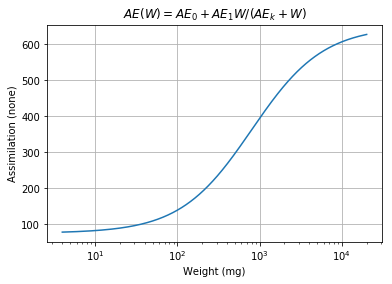

In [211]:
def ae(weight):
    ae_0 = 0.075  # none
    ae_1 = 0.575  # none
    ae_k = 0.8001 # mg dry wt
    ae = ae_0 + (ae_1 * weight) / (ae_k + weight)
    return ae

wt = np.linspace(4,20000,20000)
plt.semilogx(wt,ae(wt))
plt.title('$AE(W)=AE_0 + AE_1W/(AE_k + W)$')
plt.xlabel('Weight (mg)')
plt.ylabel('Assimilation (none)')
plt.grid(True)
plt.show()

In [212]:
ae(780)

358.8427947598253

### 2.3.3 Respiration
Respiration is the primary metabolic loss and is parameterized using a general bivalve relationship obtained at 20°C (Powell & Stanton 1985). This relationship was scaled for temperature effects on respiration by using the Q10 values for hard clam respiration that are summarized in Grizzle et al. (2000). These values were averaged, except for two that fell outside the range of the others, to obtain a Q10 value of 2.75. The respiration relationship is:

**Eq.(14)**

$$R(W,T)=a_rW^{b_{r}}e^{c_r(T-T_0)}$$

which gives increasing respiration rate with increasing temperature (Fig. 5). The respiration rate, in μl O2 h−1 clam−1, was converted to energy equivalent units using 4.75 cal (ml O2)−1, 5000 cal (g dry wt)−1 (Hibbert 1977), and 4.184 cal J−1.

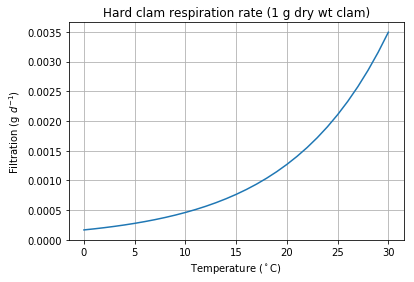

In [166]:
def respiration(weight,temper):
    a_r = 52.1314   # \muL O_2(h g dry wt)^{-1}
    b_r = 0.8484    # none
    c_r = 0.1012    # \circ$C^{-1}
    t_0 = 20
    respiration = (a_r) * \
                  (weight ** b_r) * \
                  np.exp(c_r * (temper - t_0))
    return respiration/5000*4.75/1000

temper = np.linspace(0,30,31)
plt.plot(temper,respiration(45.77,temper))
plt.title('Hard clam respiration rate (1 g dry wt clam)')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Filtration (g $d^{-1}$)')
plt.grid(True)
plt.show()

### 2.3.4 Reproduction
Hard clams are assumed to be sexually mature when they reach 20 mm (Eversole 2000). For hard clams of this length and larger, positive net production is apportioned into somatic and reproductive tissue using a temperature-dependent reproduction efficiency of the form:

**Eq.(15)**

Equation 15 applies over the range of temperatures, reported in Eversole (2000), at which hard clams form reproductive tissue. The temperature-dependent reproductive efficiency, which ranges between zero and 0.9, determines the fraction of net production that goes into reproductive tissue. The coincidence of positive reproductive efficiency and positive condition index, results in the formation of reproductive tissue. At high temperatures, reproductive tissue formation is limited by scope for growth, which is controlled by the rapid drop in filtration rate above 29°C (Eq. 9, Fig. 4) and by the number of days that hard clams experience temperature between 20°C and 27°C, as described in the following section.

### 2.3.5 Egg Production and Spawning
Spawning occurs when reproductive tissue is a certain fraction of total hard clam body weight and condition index is positive. These criteria, which set a spawning threshold, allow spawning to be dynamically determined by environmental conditions and hard clam condition, rather than being imposed.

The ratio of reproductive tissue to total body weight at which spawning occurs was determined by comparing the simulated number of eggs produced by a spawn to observations (Davis & Chanley 1956, Bricelj 1979, Bricelj & Malouf 1980, Malouf 1991, Eversole 2000) that show that an individual hard clam produces 20–40 million eggs in a year. Additional observations (Bricelj & Malouf 1980) show that the number of eggs produced drops as a function of hard clam weight as length exceeds 60–70 mm, which provides a constraint for simulated spawning.

The number of eggs produced in a simulated spawn was obtained by converting the reproductive tissue to eggs using 51 ng dry wt egg−1 (Eversole 2000). The initial simulations that used a fixed ratio of reproductive tissue to total body weight to trigger spawns overestimated egg production per individual in comparison with observations. Moreover, in some simulations, large hard clams failed to spawn because the scope for growth was inadequate to reach the spawning threshold equivalent to that in the smaller clams. Thus, a spawn ratio (SR) that depends on hard clam weight of the form:

**Eq.(16)**

was developed to provide the trigger for spawning. For hard clams less than 3 g dry wt, the ratio of reproductive tissue to total body weight at which spawning occurs is 0.2. As hard clam weight increases beyond 3 g dry wt, the spawn ratio decreases, reaching a minimum value of 0.08 for clams of 11 g dry wt. Spawning by larger hard clams is triggered at a lower fraction of reproductive tissue to total body weight, which reduces the number of eggs produced per gram weight for large hard clams (Fig. 6) because the total amount of gamete tissue spawned is smaller, but permits simulated total yearly egg production within the observed range (Eversole 2000).

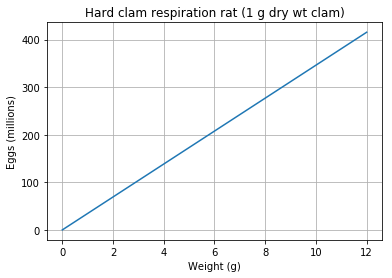

In [181]:
def sr(weight):
    sr_0 = 0.2
    sr_1 = 3.0
    sr_2 = 0.0346
    sr = sr_0 + (weight - sr_1 / 1000) * sr_2 * 1000
    return sr

weight = np.linspace(0,12,61)
plt.plot(weight,sr(weight))
plt.title('Hard clam respiration rat (1 g dry wt clam)')
plt.xlabel('Weight (g)')
plt.ylabel('Eggs (millions)')
plt.grid(True)
plt.show()

In [182]:
sr(weight)

array([9.620000e-02, 7.016200e+00, 1.393620e+01, 2.085620e+01,
       2.777620e+01, 3.469620e+01, 4.161620e+01, 4.853620e+01,
       5.545620e+01, 6.237620e+01, 6.929620e+01, 7.621620e+01,
       8.313620e+01, 9.005620e+01, 9.697620e+01, 1.038962e+02,
       1.108162e+02, 1.177362e+02, 1.246562e+02, 1.315762e+02,
       1.384962e+02, 1.454162e+02, 1.523362e+02, 1.592562e+02,
       1.661762e+02, 1.730962e+02, 1.800162e+02, 1.869362e+02,
       1.938562e+02, 2.007762e+02, 2.076962e+02, 2.146162e+02,
       2.215362e+02, 2.284562e+02, 2.353762e+02, 2.422962e+02,
       2.492162e+02, 2.561362e+02, 2.630562e+02, 2.699762e+02,
       2.768962e+02, 2.838162e+02, 2.907362e+02, 2.976562e+02,
       3.045762e+02, 3.114962e+02, 3.184162e+02, 3.253362e+02,
       3.322562e+02, 3.391762e+02, 3.460962e+02, 3.530162e+02,
       3.599362e+02, 3.668562e+02, 3.737762e+02, 3.806962e+02,
       3.876162e+02, 3.945362e+02, 4.014562e+02, 4.083762e+02,
       4.152962e+02])

## Environmental Data Sets
### Temperature, Salinity and Chlorophyll a
In this paper, a year-long time series of monthly temperature bobservations for 1977-1978 was used for study, also the salinity and the chlorophyll a.
We use 'WebPlotDigitizer' to extract the fig. 9 in paper and interpolate them to daliy data in scv format file.

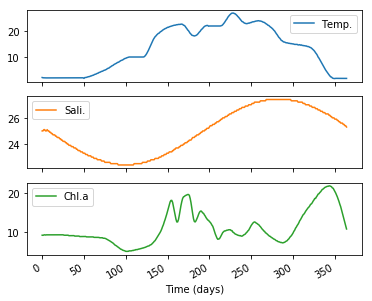

In [82]:
df = pd.read_csv('i0730-8000-25-2-417-f09.csv')
df.head()
df.plot(subplots=True, figsize=(6, 5))
plt.xlabel('Time (days)')
plt.legend(loc='best')
plt.show()